# Accenture Content Data Analysis

## Import necessary libraries and datasets

In [142]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
# Import the datasets
content_data = pd.read_csv("Content.csv")
reaction_data = pd.read_csv("Reactions.csv")
reactionType_data = pd.read_csv("ReactionTypes.csv")

## Data cleaning

### 1- Content dataset

In [66]:
# Dataset dimensions
content_data.shape

(1000, 6)

In [67]:
# Preview the dataset
content_data.head(10)

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...
5,5,cf1e8c1a-23eb-4426-9f58-002fb1b53e91,4607d7b0-3313-49b8-9f73-5b8227fc5b67,GIF,cooking,NaN
6,6,3f8590c7-6ab2-4973-805a-90cdec355f05,ae600af5-c1f0-4b1f-adb0-1b4c246373e4,video,dogs,https://socialbuzz.cdn.com/content/storage/3f8...
7,7,e5490118-90d5-4572-ab1c-1fbc87b8d9ca,583f2bde-886d-4cf3-a5c4-7cb60cd25df3,video,technology,https://socialbuzz.cdn.com/content/storage/e54...
8,8,0bedca96-fb76-4287-a83c-17330ed39cce,2bd9c167-e06c-47c1-a978-3403d6724606,photo,soccer,https://socialbuzz.cdn.com/content/storage/0be...
9,9,b18cb63f-4c8e-44ee-a47f-541e95191d11,13f0db8a-152a-496f-a6e8-1ed6a90b8788,photo,public speaking,https://socialbuzz.cdn.com/content/storage/b18...


In [68]:
# More details about the dataset
content_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   Content ID  1000 non-null   object
 2   User ID     1000 non-null   object
 3   Type        1000 non-null   object
 4   Category    1000 non-null   object
 5   URL         801 non-null    object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [69]:
# Identify missing values
content_data.isna().sum()

Unnamed: 0      0
Content ID      0
User ID         0
Type            0
Category        0
URL           199
dtype: int64

There are only missing values in the "URL" column. Since that variable is not relevant for our analysis, we'll drop it along with the "Unnamed" variable 

In [70]:
# Drop non-relevant columns
content_data = content_data.drop(columns= ["Unnamed: 0","URL", "User ID"])

In [71]:
# Identify duplicates
content_data.duplicated().sum()

0

There is no duplicate rows in the dataset

In [72]:
# Rename columns
content_data.rename(columns={'Type': 'Content Type'}, inplace= True)

In [73]:
# Inspect the unique values of "Content Type"
content_data['Content Type'].unique()

array(['photo', 'video', 'GIF', 'audio'], dtype=object)

In [74]:
# Standardize the typos
content_data['Content Type'] = content_data['Content Type'].str.title()

In [75]:
# Inspect the unique values of "Category"
content_data['Category'].unique()

array(['Studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'studying', 'veganism', 'Animals',
       'animals', 'culture', '"culture"', 'Fitness', '"studying"',
       'Veganism', '"animals"', 'Travel', '"soccer"', 'Education',
       '"dogs"', 'Technology', 'Soccer', '"tennis"', 'Culture', '"food"',
       'Food', '"technology"', 'Healthy Eating', '"cooking"', 'Science',
       '"public speaking"', '"veganism"', 'Public Speaking', '"science"'],
      dtype=object)

The unique values are not uniforms: 'culture' and '"animals"'

In [76]:
# Standardize the typos
content_data['Category'] = content_data['Category'].replace('"','', regex=True)
content_data['Category'] = content_data['Category'].str.title()

In [77]:
# Let's check it
content_data['Category'].unique()

array(['Studying', 'Healthy Eating', 'Technology', 'Food', 'Cooking',
       'Dogs', 'Soccer', 'Public Speaking', 'Science', 'Tennis', 'Travel',
       'Fitness', 'Education', 'Veganism', 'Animals', 'Culture'],
      dtype=object)

Job done here

### 2- Reaction dataset

In [78]:
# Dataset dimensions
reaction_data.shape

(25553, 5)

In [79]:
# Preview the dataset
reaction_data.head()

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [80]:
# More details about the dataset
reaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25553 entries, 0 to 25552
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  25553 non-null  int64 
 1   Content ID  25553 non-null  object
 2   User ID     22534 non-null  object
 3   Type        24573 non-null  object
 4   Datetime    25553 non-null  object
dtypes: int64(1), object(4)
memory usage: 998.3+ KB


In [81]:
# Identify missing values
reaction_data.isna().sum()

Unnamed: 0       0
Content ID       0
User ID       3019
Type           980
Datetime         0
dtype: int64

In [82]:
# Drop missing values
reaction_data = reaction_data.dropna()

In [83]:
# Drop irrelevant columns
reaction_data = reaction_data.drop(columns= ['Unnamed: 0', 'User ID'])

In [84]:
# Convert Dates type
reaction_data['Datetime'] = pd.to_datetime(reaction_data['Datetime'])

In [85]:
# Rename column
reaction_data.rename(columns={'Type': 'Reaction Type'}, inplace=True)

In [86]:
# Inspect unique values
reaction_data['Reaction Type'].unique()

array(['disgust', 'dislike', 'scared', 'interested', 'peeking', 'cherish',
       'hate', 'indifferent', 'super love', 'worried', 'like', 'heart',
       'want', 'intrigued', 'love', 'adore'], dtype=object)

In [87]:
# Standardize unique values
reaction_data['Reaction Type'] = reaction_data['Reaction Type'].str.title()

In [88]:
# Data integrity tests
print("Number of missing values:", reaction_data.isna().sum())

Number of missing values: Content ID       0
Reaction Type    0
Datetime         0
dtype: int64


In [89]:
print("Number of duplicates:", reaction_data.duplicated().sum())

Number of duplicates: 0


In [90]:
reaction_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22534 entries, 1 to 25552
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Content ID     22534 non-null  object        
 1   Reaction Type  22534 non-null  object        
 2   Datetime       22534 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 704.2+ KB


### 3- ReactionType dataset

In [91]:
# Dataset dimensions
reactionType_data.shape

(16, 4)

In [92]:
# Preview dataset
reactionType_data.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [93]:
# More details
reactionType_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  16 non-null     int64 
 1   Type        16 non-null     object
 2   Sentiment   16 non-null     object
 3   Score       16 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 640.0+ bytes


In [94]:
# Drop irrelevant column
reactionType_data = reactionType_data.drop(columns= "Unnamed: 0")

In [95]:
# Rename column
reactionType_data.rename(columns={'Type': 'Reaction Type'}, inplace=True)

In [96]:
# Inspect unique values
reactionType_data['Reaction Type'].unique()

array(['heart', 'want', 'disgust', 'hate', 'interested', 'indifferent',
       'love', 'super love', 'cherish', 'adore', 'like', 'dislike',
       'intrigued', 'peeking', 'scared', 'worried'], dtype=object)

In [97]:
reactionType_data['Sentiment'].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [98]:
# Standardize typos
reactionType_data['Reaction Type'] = reactionType_data['Reaction Type'].str.title()
reactionType_data['Sentiment'] = reactionType_data['Sentiment'].str.title()

In [99]:
# Data integrity tests
print("Number of missing values:", reactionType_data.isna().sum())

Number of missing values: Reaction Type    0
Sentiment        0
Score            0
dtype: int64


In [100]:
print("Number of duplicates:", reactionType_data.duplicated().sum())

Number of duplicates: 0


In [101]:
reactionType_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Reaction Type  16 non-null     object
 1   Sentiment      16 non-null     object
 2   Score          16 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 512.0+ bytes


Data cleaned

### Merge the datasets

In [102]:
# Merge Reactions with Reaction Types to get 'Sentiment' and 'Score'
reaction_data = pd.merge(reaction_data, reactionType_data, on='Reaction Type', how='left')

# Merge Reactions with Content to get 'Content Type' and 'Category'
reaction_data = pd.merge(reaction_data, content_data, on='Content ID', how='left')

# Display the updated DataFrame
reaction_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22534 entries, 0 to 22533
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Content ID     22534 non-null  object        
 1   Reaction Type  22534 non-null  object        
 2   Datetime       22534 non-null  datetime64[ns]
 3   Sentiment      22534 non-null  object        
 4   Score          22534 non-null  int64         
 5   Content Type   22534 non-null  object        
 6   Category       22534 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 1.4+ MB


In [103]:
# Display the updated DataFrame
reaction_data.head()

,Content ID,Reaction Type,Datetime,Sentiment,Score,Content Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,Disgust,2020-11-07 09:43:50,Negative,0,Photo,Studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,Dislike,2021-06-17 12:22:51,Negative,10,Photo,Studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,Scared,2021-04-18 05:13:58,Negative,15,Photo,Studying
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,Disgust,2021-01-06 19:13:01,Negative,0,Photo,Studying
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,Interested,2020-08-23 12:25:58,Positive,30,Photo,Studying


In [104]:
# Save clean data
reaction_data.to_csv('./clean_data.csv')

## Engagement Analysis

### Which content types drive the highest engagement (measured by the number of reactions)?

In [105]:
reaction_data["Content Type"].value_counts()

Photo    6043
Video    5728
Gif      5578
Audio    5185
Name: Content Type, dtype: int64

### Are there particular categories that users react to more frequently or positively?

In [106]:
# Count total reactions per category
reaction_counts = reaction_data.groupby('Category').size().reset_index(name='Total Reactions')


In [107]:
# Count positive reactions per category
positive_reactions = reaction_data[reaction_data['Sentiment'] == 'Positive'].groupby('Category').size().reset_index(name='Positive Reactions')

# Merge with total reactions
reaction_analysis = pd.merge(reaction_counts, positive_reactions, on='Category', how='left')
reaction_analysis['Positive Rate'] = (reaction_analysis['Positive Reactions'] / reaction_analysis['Total Reactions']) * 100
print(reaction_analysis)


           Category  Total Reactions  Positive Reactions  Positive Rate
0           Animals             1738                 962      55.350978
1           Cooking             1525                 851      55.803279
2           Culture             1538                 855      55.591678
3              Dogs             1227                 689      56.153219
4         Education             1311                 751      57.284516
5           Fitness             1284                 721      56.152648
6              Food             1556                 872      56.041131
7    Healthy Eating             1572                 896      56.997455
8   Public Speaking             1116                 661      59.229391
9           Science             1646                 934      56.743621
10           Soccer             1339                 752      56.161314
11         Studying             1251                 697      55.715428
12       Technology             1557                 896      57

In [108]:
# Sort by Total Reactions
top_categories_by_frequency = reaction_analysis.sort_values(by='Total Reactions', ascending=False)

# Sort by Positive Rate
top_categories_by_positivity = reaction_analysis.sort_values(by='Positive Rate', ascending=False)

print("Categories with the most reactions:\n", top_categories_by_frequency.head())
print("Categories with the highest positivity rate:\n", top_categories_by_positivity.head())


Categories with the most reactions:
           Category  Total Reactions  Positive Reactions  Positive Rate
0          Animals             1738                 962      55.350978
9          Science             1646                 934      56.743621
7   Healthy Eating             1572                 896      56.997455
12      Technology             1557                 896      57.546564
6             Food             1556                 872      56.041131
Categories with the highest positivity rate:
            Category  Total Reactions  Positive Reactions  Positive Rate
8   Public Speaking             1116                 661      59.229391
12       Technology             1557                 896      57.546564
4         Education             1311                 751      57.284516
7    Healthy Eating             1572                 896      56.997455
9           Science             1646                 934      56.743621


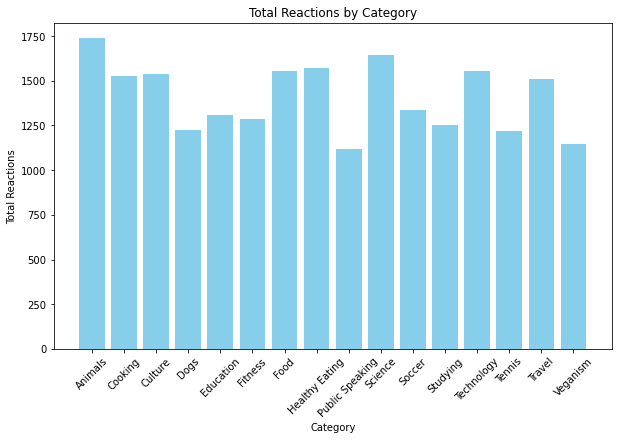

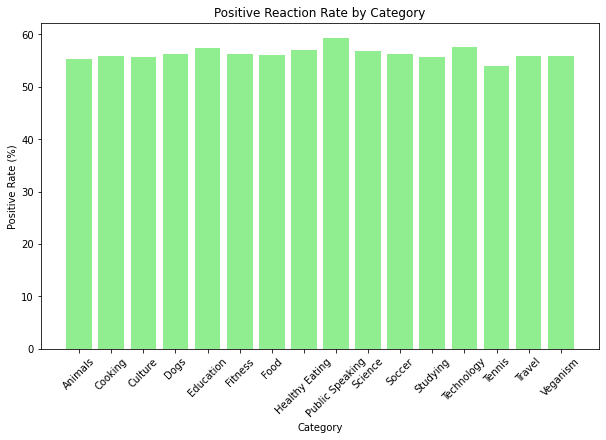

In [109]:
# Bar plot for total reactions
plt.figure(figsize=(10, 6))
plt.bar(reaction_analysis['Category'], reaction_analysis['Total Reactions'], color='skyblue')
plt.title('Total Reactions by Category')
plt.xlabel('Category')
plt.ylabel('Total Reactions')
plt.xticks(rotation=45)
plt.show()

# Bar plot for positive rate
plt.figure(figsize=(10, 6))
plt.bar(reaction_analysis['Category'], reaction_analysis['Positive Rate'], color='lightgreen')
plt.title('Positive Reaction Rate by Category')
plt.xlabel('Category')
plt.ylabel('Positive Rate (%)')
plt.xticks(rotation=45)
plt.show()

- The category 'Animals' has the highest number of reactions, followed by 'Science' and 'Healthy Eating'.

- The category 'Public Speaking' has the highest positivity rate at 59%, suggesting users strongly associate positive sentiment with this content."

### What is the distribution of reaction types across different categories?

In [110]:
# Group by Category and Reaction Type, then count occurrences
reaction_distribution = reaction_data.groupby(['Category', 'Reaction Type']).size().reset_index(name= 'Count')

# Pivot the table for better viz
reaction_pivot = reaction_distribution.pivot(index='Category', columns='Reaction Type', values='Count').fillna(0)

print(reaction_pivot)

Reaction Type    Adore  Cherish  Disgust  Dislike  Hate  Heart  Indifferent  \
Category                                                                      
Animals            104      116      108      105   118    114           91   
Cooking             99       80      100      100   100    101           77   
Culture             86      102       92      101    90     83          105   
Dogs                76       64       77       74    83     92           83   
Education           80       78       62       85    87     83           82   
Fitness             91       69       93       90    63     75           74   
Food                82      108       97       93   117    102           88   
Healthy Eating     108       95       98       90   109    103           99   
Public Speaking     76       61       62       74    54     80           69   
Science            110       98      103      102    90    105          117   
Soccer              83       76       83       74   

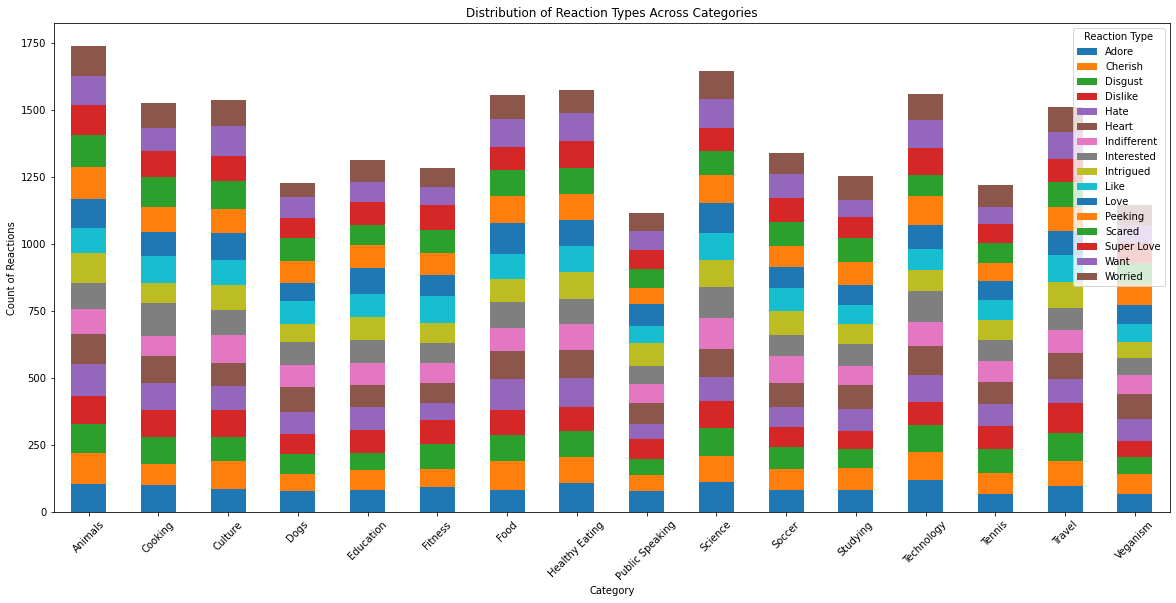

In [111]:
# Create a stacked bar chart
reaction_pivot.plot(kind='bar', stacked=True, figsize=(20,9))
plt.title('Distribution of Reaction Types Across Categories')
plt.xlabel('Category')
plt.ylabel('Count of Reactions')
plt.legend(title='Reaction Type', loc="upper right")
plt.xticks(rotation=45)
plt.show()

- In the Food category, the most common reaction type is Love, followed by Peeking.

- The Travel category has a higher proportion of Dislikes compared to other categories.


## Sentiment Analysis

### Which content generates the most positive sentiment? The most negative sentiment?

In [112]:
# Group by Content ID and Sentiment, then count
sentiment_counts = reaction_data.groupby(['Content ID', 'Sentiment']).size().reset_index(name='Count')

# Pivot table to separate Positive and Negative counts
sentiment_pivot = sentiment_counts.pivot(index='Content ID', columns='Sentiment', values='Count').fillna(0)

# Add total reactions per content for context 
sentiment_pivot['Total Reactions'] = sentiment_pivot.sum(axis=1)

print(sentiment_pivot)


Sentiment                             Negative  Neutral  Positive  \
Content ID                                                          
004e820e-49c3-4ba2-9d02-62db0065410c       0.0      0.0       1.0   
00d0cdf9-5919-4102-bf84-ebde253c3cd2      13.0      4.0      25.0   
01396602-c759-4a17-90f0-8f9b3ca11b30      15.0      3.0      18.0   
019b61f4-926c-438e-adaf-6119c5eab752       4.0      2.0       6.0   
01ab84dd-6364-4236-abbb-3f237db77180       1.0      0.0       0.0   
...                                        ...      ...       ...   
fdca8d15-966b-4825-8133-1fafc5c1f9fc       8.0      2.0      15.0   
fe06b730-b1f8-4f55-af1a-52487d8f1ec6       8.0      3.0      12.0   
fea8d77c-fd0b-4678-868f-fbae567642f3       1.0      1.0       4.0   
fea9077f-2fe7-43bd-aaef-dc2619988d94       1.0      3.0       2.0   
ff883828-a610-492d-8635-8a777eaad25f      15.0      8.0      21.0   

Sentiment                             Total Reactions  
Content ID                                    

In [113]:
# Identify the most positive content
most_positive_content = sentiment_pivot.sort_values(by='Positive', ascending=False).head(1)
print("Content with the most positive sentiment:\n", most_positive_content)


Content with the most positive sentiment:
 Sentiment                             Negative  Neutral  Positive  \
Content ID                                                          
cd568dd1-70cf-45d6-b495-10eebff8c920       8.0      4.0      32.0   

Sentiment                             Total Reactions  
Content ID                                             
cd568dd1-70cf-45d6-b495-10eebff8c920             44.0  


In [114]:
# Identify the most negative content
most_negative_content = sentiment_pivot.sort_values(by='Negative', ascending=False).head(1)
print("Content with the most negative sentiment:\n", most_negative_content)


Content with the most negative sentiment:
 Sentiment                             Negative  Neutral  Positive  \
Content ID                                                          
d90a34f1-60ed-4a79-b7bf-fd22efa12e4c      23.0      3.0      18.0   

Sentiment                             Total Reactions  
Content ID                                             
d90a34f1-60ed-4a79-b7bf-fd22efa12e4c             44.0  


In [115]:
# Calculate proportions
sentiment_pivot['Positive Rate'] = (sentiment_pivot['Positive'] / sentiment_pivot['Total Reactions']) * 100
sentiment_pivot['Negative Rate'] = (sentiment_pivot['Negative'] / sentiment_pivot['Total Reactions']) * 100

# Find content with highest Positive and Negative Rates
most_positive_rate_content = sentiment_pivot.sort_values(by='Positive Rate', ascending=False).head(1)
most_negative_rate_content = sentiment_pivot.sort_values(by='Negative Rate', ascending=False).head(1)

print("Content with the highest positive rate:\n", most_positive_rate_content)
print("Content with the highest negative rate:\n", most_negative_rate_content)


Content with the highest positive rate:
 Sentiment                             Negative  Neutral  Positive  \
Content ID                                                          
004e820e-49c3-4ba2-9d02-62db0065410c       0.0      0.0       1.0   

Sentiment                             Total Reactions  Positive Rate  \
Content ID                                                             
004e820e-49c3-4ba2-9d02-62db0065410c              1.0          100.0   

Sentiment                             Negative Rate  
Content ID                                           
004e820e-49c3-4ba2-9d02-62db0065410c            0.0  
Content with the highest negative rate:
 Sentiment                             Negative  Neutral  Positive  \
Content ID                                                          
88e43f42-027e-4256-bab4-2d1c2b6f8f67       1.0      0.0       0.0   

Sentiment                             Total Reactions  Positive Rate  \
Content ID                                         

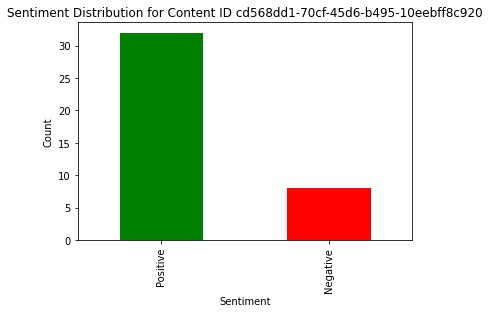

In [116]:
# Bar chart for a specific content
top_content_id = most_positive_content.index[0]
top_content_data = sentiment_pivot.loc[top_content_id]

top_content_data[['Positive', 'Negative']].plot(kind='bar', color=['green', 'red'])
plt.title(f'Sentiment Distribution for Content ID {top_content_id}')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


- Content ID cd568dd1-70cf-45d6-b495-10eebff8c920 generated the most positive reactions, with 32 positive sentiments out of 44 total reactions (72.73% positivity rate)

- Content ID d90a34f1-60ed-4a79-b7bf-fd22efa12e4c generated the most negative reactions, with 23 negative sentiments out of 44 total reactions (52.27% negativity rate).

### Are there any patterns between content type or category and sentiment trends?

In [126]:
# Group by Content Type and Sentiment
content_type_sentiment = reaction_data.groupby(['Content Type', 'Sentiment']).size().reset_index(name='Count')

# Pivot table for better readability
content_type_pivot = content_type_sentiment.pivot(index='Content Type', columns='Sentiment', values='Count').fillna(0)

# Add totals for context
content_type_pivot['Total Reactions'] = content_type_pivot.sum(axis=1)

print(content_type_pivot)

# Group by Category and Sentiment
category_sentiment = reaction_data.groupby(['Category', 'Sentiment']).size().reset_index(name='Count')

# Pivot table for better readability
category_pivot = category_sentiment.pivot(index='Category', columns='Sentiment', values='Count').fillna(0)

# Add totals for context
category_pivot['Total Reactions'] = category_pivot.sum(axis=1)

print(category_pivot)


Sentiment     Negative  Neutral  Positive  Total Reactions
Content Type                                              
Audio             1608      613      2964             5185
Gif               1758      715      3105             5578
Photo             1878      767      3398             6043
Video             1793      728      3207             5728
Sentiment        Negative  Neutral  Positive  Total Reactions
Category                                                     
Animals               566      210       962             1738
Cooking               502      172       851             1525
Culture               488      195       855             1538
Dogs                  371      167       689             1227
Education             389      171       751             1311
Fitness               409      154       721             1284
Food                  493      191       872             1556
Healthy Eating        477      199       896             1572
Public Speaking       326 

In [127]:
# Normalize Content Type Sentiments
content_type_pivot['Positive Rate'] = (content_type_pivot['Positive'] / content_type_pivot['Total Reactions']) * 100
content_type_pivot['Negative Rate'] = (content_type_pivot['Negative'] / content_type_pivot['Total Reactions']) * 100

# Normalize Category Sentiments
category_pivot['Positive Rate'] = (category_pivot['Positive'] / category_pivot['Total Reactions']) * 100
category_pivot['Negative Rate'] = (category_pivot['Negative'] / category_pivot['Total Reactions']) * 100

print(content_type_pivot[['Positive Rate', 'Negative Rate']])
print(category_pivot[['Positive Rate', 'Negative Rate']])


Sentiment     Positive Rate  Negative Rate
Content Type                              
Audio             57.164899      31.012536
Gif               55.665113      31.516673
Photo             56.230349      31.077279
Video             55.988128      31.302374
Sentiment        Positive Rate  Negative Rate
Category                                     
Animals              55.350978      32.566168
Cooking              55.803279      32.918033
Culture              55.591678      31.729519
Dogs                 56.153219      30.236349
Education            57.284516      29.672006
Fitness              56.152648      31.853583
Food                 56.041131      31.683805
Healthy Eating       56.997455      30.343511
Public Speaking      59.229391      29.211470
Science              56.743621      29.829891
Soccer               56.161314      30.171770
Studying             55.715428      31.734612
Technology           57.546564      29.865125
Tennis               53.858785      33.908046
Travel

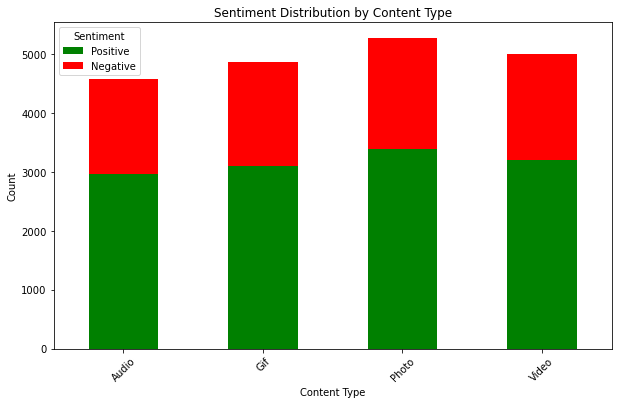

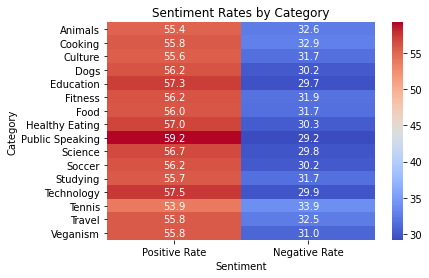

In [129]:
# Bar Chart for Content Type Sentiment Trends
content_type_pivot[['Positive', 'Negative']].plot(kind='bar', stacked=True, figsize=(10, 6), color=['green', 'red'])
plt.title('Sentiment Distribution by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.show()

# Heatmap for Category Sentiment Rates
sns.heatmap(category_pivot[['Positive Rate', 'Negative Rate']], annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Sentiment Rates by Category')
plt.xlabel('Sentiment')
plt.ylabel('Category')
plt.show()


- Content in the Public Speaking category shows a higher proportion of Positive sentiments (59.2%), while Travel content has a significant share of Negative sentiments (32.52%).

- Audios consistently generate more positive sentiments compared to GIF, which tend to have mixed reactions.

## Performance Metrics

### How do different scores vary across categories and content types?

In [133]:
# Group by Content Type and calculate statistics
content_type_scores = reaction_data.groupby('Content Type')['Score'].agg(['mean', 'median', 'std']).reset_index()
print("Score statistics by Content Type:")
print(content_type_scores)


Score statistics by Content Type:
  Content Type       mean  median        std
0        Audio  40.098554      45  26.136316
1          Gif  39.247401      35  25.996871
2        Photo  39.895747      45  26.086342
3        Video  39.378317      35  25.924024


In [134]:
# Group by Category and calculate statistics
category_scores = reaction_data.groupby('Category')['Score'].agg(['mean', 'median', 'std']).reset_index()
print("Score statistics by Category:")
print(category_scores)

Score statistics by Category:
           Category       mean  median        std
0           Animals  39.484465      35  26.203074
1           Cooking  38.802623      35  26.072174
2           Culture  39.442783      35  26.079722
3              Dogs  39.444173      35  25.797191
4         Education  40.243326      45  25.648168
5           Fitness  39.591121      45  26.158435
6              Food  39.587404      35  26.173194
7    Healthy Eating  40.164122      45  26.157770
8   Public Speaking  40.995520      45  25.756204
9           Science  39.735723      35  25.775156
10           Soccer  39.743092      45  25.901152
11         Studying  39.521982      35  25.882166
12       Technology  40.484907      45  26.352720
13           Tennis  37.918719      35  26.171311
14           Travel  39.309934      45  26.211493
15         Veganism  40.053229      45  26.034974


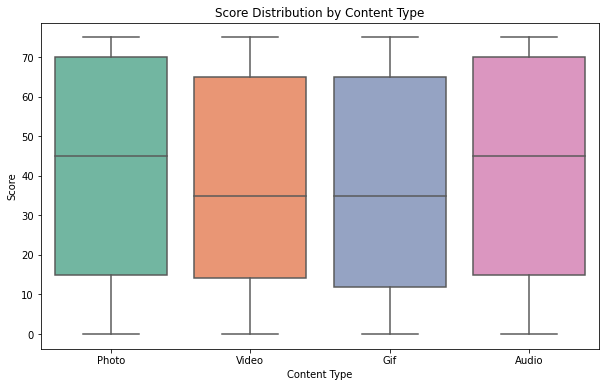

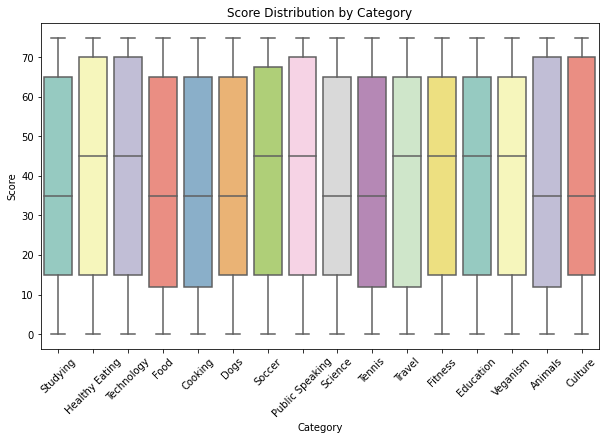

In [136]:
# Boxplot for Content Type vs Score
plt.figure(figsize=(10, 6))
sns.boxplot(x='Content Type', y='Score', data=reaction_data, palette='Set2')
plt.title('Score Distribution by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Score')
plt.show()

# Boxplot for Category vs Score
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Score', data=reaction_data, palette='Set3')
plt.title('Score Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()


In [143]:
from scipy.stats import f_oneway

# One-way ANOVA for Content Type
content_type_groups = [group['Score'].values for _, group in reaction_data.groupby('Content Type')]
f_stat, p_value = f_oneway(*content_type_groups)
print(f"ANOVA results for Content Type - F-statistic: {f_stat}, p-value: {p_value}")

# One-way ANOVA for Category
category_groups = [group['Score'].values for _, group in reaction_data.groupby('Category')]
f_stat, p_value = f_oneway(*category_groups)
print(f"ANOVA results for Category - F-statistic: {f_stat}, p-value: {p_value}")


ANOVA results for Content Type - F-statistic: 1.3450793651086559, p-value: 0.2577130700035412
ANOVA results for Category - F-statistic: 0.9156091000532722, p-value: 0.545798045856223


A p-value greater than 0.05 suggests that the differences in mean Score values across the groups are not statistically significant.

The data does not provide enough evidence to conclude that the mean Score differs significantly across Content Type groups or the Category groups.

The observed differences in group means could be due to random variation rather than meaningful patterns.

- Audio have the highest average scores (40.09), indicating they are better received compared to Gif (39.24).

- The variability in scores is highest for Audio, suggesting mixed reactions.

- Public Speaking content shows the highest mean score (40.99), while Tennis has the lowest (37.91).

The Technology category has a wide range of scores, indicating diverse reactions from users."

## Time-based Trends

### Are there specific times of day or days of the week when user engagement is highest?

In [ ]:
# Extract hour and day of the week from Datetime
reaction_data['Hour'] = reaction_data['Datetime'].dt.hour
reaction_data['Day_of_Week'] = reaction_data['Datetime'].dt.day_name()

# Preview the data
print(reaction_data[['Datetime', 'Hour', 'Day_of_Week']].head())

             Datetime  Hour Day_of_Week
0 2020-11-07 09:43:50     9    Saturday
1 2021-06-17 12:22:51    12    Thursday
2 2021-04-18 05:13:58     5      Sunday
3 2021-01-06 19:13:01    19   Wednesday
4 2020-08-23 12:25:58    12      Sunday


In [149]:
# Group by hour and day of the week
engagement_by_hour = reaction_data.groupby('Hour').size().reset_index(name='Total Reactions')
engagement_by_day = reaction_data.groupby('Day_of_Week').size().reset_index(name='Total Reactions')

# Order days of the week correctly
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
engagement_by_day['Day_of_Week'] = pd.Categorical(engagement_by_day['Day_of_Week'], categories=days_order, ordered=True)
engagement_by_day = engagement_by_day.sort_values('Day_of_Week')

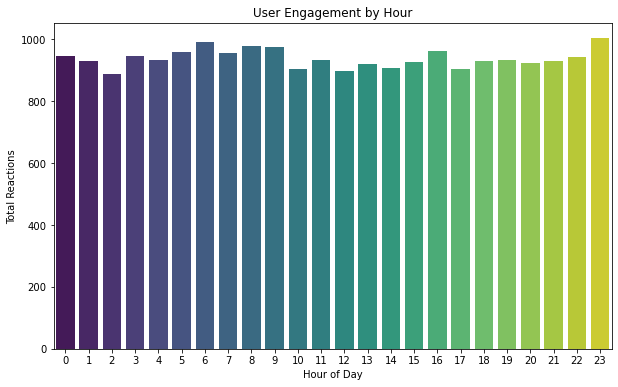

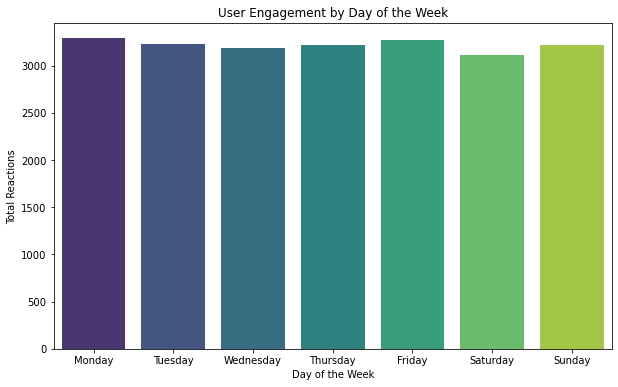

In [150]:
# Plot engagement by hour
plt.figure(figsize=(10, 6))
sns.barplot(x='Hour', y='Total Reactions', data=engagement_by_hour, palette='viridis')
plt.title('User Engagement by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Total Reactions')
plt.show()

# Plot engagement by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x='Day_of_Week', y='Total Reactions', data=engagement_by_day, palette='viridis')
plt.title('User Engagement by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Reactions')
plt.show()

In [151]:
from scipy.stats import chi2_contingency

# Chi-square test
chi2, p, _, _ = chi2_contingency([engagement_by_day['Total Reactions']])
print(f"Chi-Square Test: p-value = {p}")

Chi-Square Test: p-value = 1.0


### Does the sentiment of reactions vary based on time (e.g., are users more negative in the evening)?

## Optimization

### How can low-performing content types or categories be improved to align better with user preferences?

### Is there an optimal combination of content type, category, and time that maximizes positive reactions?

## User Behavior Insights

### Are there any notable patterns or correlations between reaction type and sentiment?

### How do high and low-scoring reactions differ in terms of their associated content and timing?